**<h1 align=center> You Can't Handle the Truth <h1>**
<h2 align=center> Fake News Classifier <h2>
<h2 align=center> Group: Truth Seekers <h2>

# **Overview**

This notebook uses Kaggle datasets to classify if news articles are fake or real. Multiple datasets are used for accuracy comparison. We will start by importing and cleaning the data. Then, the data will be split into training and testing sets and different models will be used to fit the data. Three models are used including KNN, Decision Trees, and Naive Bayes. This will be done by transforming the raw text into float values using the TFIDF Vectorizer as well as the Count Vectorizer. Finally, the results will be analyzed.

# **Data Exploration**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Original Dataset: Taken from https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset
# True = 1, False = 0
news = pd.read_csv('/content/drive/Shared drives/CSCI 5523/FakeNews/mergedNew.csv', usecols = ['title','text', 'truth value'])

In [ ]:
# Additional Testing Dataset: Taken from https://www.kaggle.com/hassanamin/textdb3

df = pd.read_csv('/content/drive/Shared drives/CSCI 5523/FakeNews/fake_or_real_news.csv') 

In [ ]:
df.label[df.label=='FAKE']=int(0)
df.label[df.label=='REAL']=int(1)

In [ ]:
news.columns

Index(['title', 'text', 'truth value'], dtype='object')

In [ ]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [ ]:
news.head()

,title,text,truth value
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [ ]:
pip install datacompy

In [ ]:
import datacompy

compare = datacompy.Compare(
news,
df,
join_columns=['title','text']
)
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns   Rows
0       df1        3  44919
1       df2        4   6335

Column Summary
--------------

Number of columns in common: 2
Number of columns in df1 but not in df2: 1
Number of columns in df2 but not in df1: 2

Row Summary
-----------

Matched on: title, text
Any duplicates on match values: Yes
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 0
Number of rows in df1 but not in df2: 44,919
Number of rows in df2 but not in df1: 6,335

Number of rows with some compared columns unequal: 0
Number of rows with all compared columns equal: 0

Column Comparison
-----------------

Number of columns compared with some values unequal: 0
Number of columns compared with all values equal: 2
Total number of values which compare unequal: 0

Sample Rows Only in df1 (First 10 Columns)
------------------------------------------

                                                       

In [ ]:
news.tail()

,title,text,truth value
44914,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44915,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44916,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1
44917,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1
44918,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,1


In [ ]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,1


In [ ]:
news.shape

(44919, 3)

The original dataset being used to fit and test the models includes 44,919 rows.

In [ ]:
df.shape

(6335, 4)

The new dataset being used to test the trained models includes 6,335 rows.

In [ ]:
news.isnull().any()

title          False
text           False
truth value    False
dtype: bool

There are no null values.

In [ ]:
df.isnull().any()

Unnamed: 0    False
title         False
text          False
label         False
dtype: bool

There are no null values.

In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        44919 non-null  object
 1   text         44919 non-null  object
 2   truth value  44919 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


No handles with labels found to put in legend.


Real Articles:  21417
Fake Articles:  23502


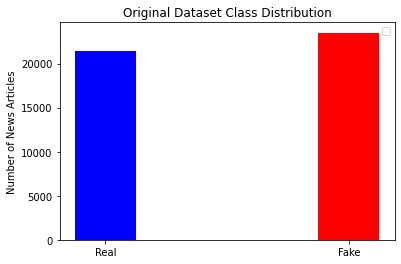

In [ ]:
trueNews = sum(news['truth value'] == 1)
falseNews = sum(news['truth value'] == 0)

plt.bar('Real', trueNews, color = 'b', width = 0.25)
plt.bar('Fake', falseNews, color = 'r', width = 0.25)

print("Real Articles: ",trueNews)
print("Fake Articles: ", falseNews)

plt.title("Original Dataset Class Distribution")
plt.ylabel("Number of News Articles")
plt.legend(loc='upper right')

No handles with labels found to put in legend.


Real Articles:  3171
Fake Articles:  3164


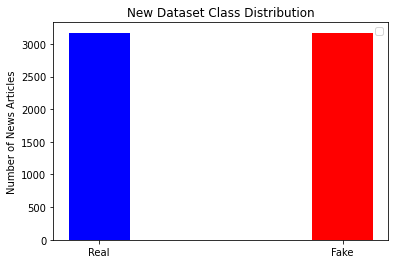

In [ ]:
trueNews = sum(df['label'] == 1)
falseNews = sum(df['label'] == 0)

plt.bar('Real', trueNews, color = 'b', width = 0.25)
plt.bar('Fake', falseNews, color = 'r', width = 0.25)

print("Real Articles: ",trueNews)
print("Fake Articles: ", falseNews)

plt.title("New Dataset Class Distribution")
plt.ylabel("Number of News Articles")
plt.legend(loc='upper right')

Both datasets are pretty balanced.

# **Data Cleaning**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords

In [ ]:
# Referenced https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794

def preprocess_text(x):
  # clean data
  text = re.sub(r'[^\w\s]', '', str(x).lower().strip()) # Converts to lower case
  text = re.sub(r'\([^)]*\)', " ", text) # Remove parentheses

  # tokenize
  lst_text = text.split()

  # remove stopwords
  stop_words = stopwords.words('english')
  lst_text = [word for word in lst_text if word not in stop_words]
          
  # lemmatization
  lem = nltk.stem.wordnet.WordNetLemmatizer()
  lst_text = [lem.lemmatize(word) for word in lst_text]
          
  # back to string from list
  text = " ".join(lst_text)
  return text

In [ ]:
news["new_text"] = news["text"].apply(lambda x: preprocess_text(x))

In [ ]:
df["new_text"] = df["text"].apply(lambda x: preprocess_text(x))

In [ ]:
news.head()

,title,text,truth value,new_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,donald trump wish american happy new year leav...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,friday revealed former milwaukee sheriff david...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,christmas day donald trump announced would bac...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,pope francis used annual christmas day message...


In [ ]:
df.head()

,Unnamed: 0,title,text,label,new_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,daniel greenfield shillman journalism fellow f...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,google pinterest digg linkedin reddit stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,u secretary state john f kerry said monday sto...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,kaydee king kaydeeking november 9 2016 lesson ...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,primary day new york frontrunners hillary clin...


**Word Clouds - Original Dataset**

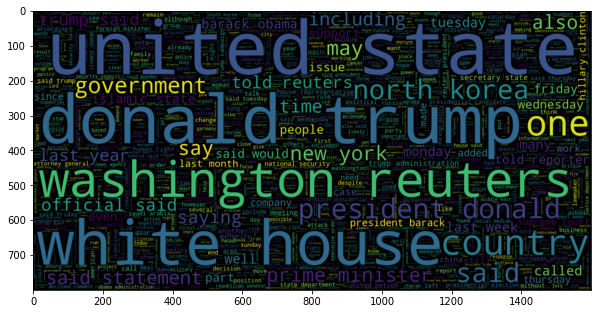

In [ ]:
from wordcloud import WordCloud

# Real News
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords.words('english')).generate(" ".join(news[news["truth value"] == 1].new_text))
plt.imshow(wc , interpolation = 'bilinear')

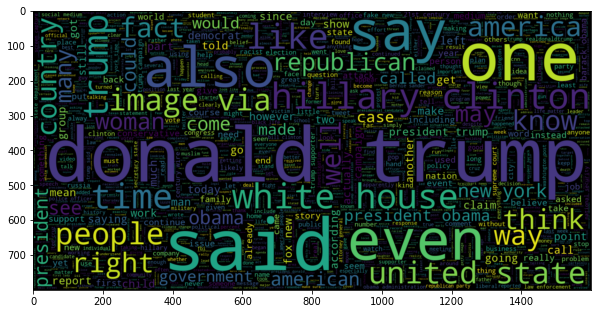

In [ ]:
# Fake News
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords.words('english')).generate(" ".join(news[news["truth value"] == 0].new_text))
plt.imshow(wc , interpolation = 'bilinear')

**Words Clouds - New Dataset**

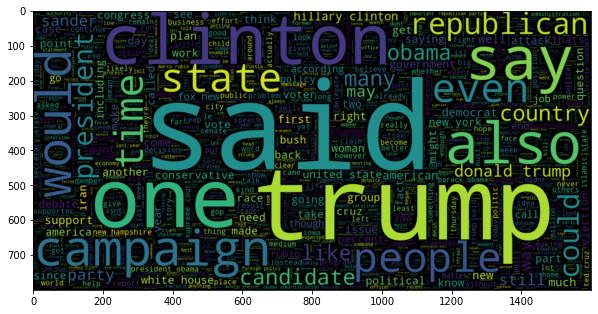

In [ ]:
# New Dataset
# Real News
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords.words('english')).generate(" ".join(df[df.label == 1].new_text))
plt.imshow(wc , interpolation = 'bilinear')

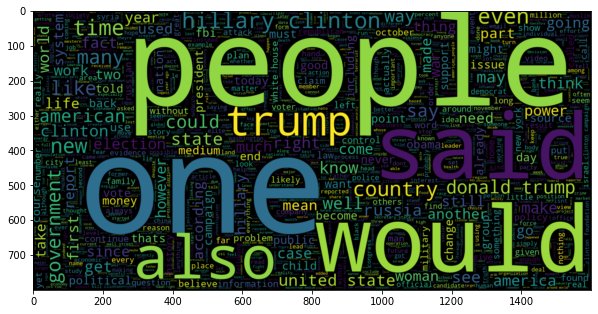

In [ ]:
# Fake News
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords.words('english')).generate(" ".join(df[df.label == 0].new_text))
plt.imshow(wc , interpolation = 'bilinear')

Based on the word clouds for both datasets, we can see that they are both politically focused with frequent words like "trump" and "clinton".

**Split Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split
y = news['truth value']
X_train, X_test, y_train, y_test = train_test_split(news['new_text'], news['truth value'], test_size=0.3,
random_state=17)

X_train1, X_test1, y_train1, y_test1 = train_test_split(df['new_text'], df['label'], test_size=0.99,
random_state=17)

# **Models**

Count vectorizer counts the number of times a word occurs within each document which results in a bias towards the most frequent words within a dataset. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

# Vectorize the data using countvectorizer
count_vectorizer = CountVectorizer(stop_words='english')
X_count_train = count_vectorizer.fit_transform(X_train)
X_count_test = count_vectorizer.transform(X_test)
X_count_test1 = count_vectorizer.transform(X_test1)

count_models_acc = []
count_models2_acc = []

TFIDF vectorizer creates a matrix that compares how frequent a word appears in a document with the number of documents within which the word appears.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the data using tfidfvectorizer
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
X_tfidf_train = tfidf_vectorizer.fit_transform(X_train)
X_tfidf_test = tfidf_vectorizer.transform(X_test)
X_tfidf_test1 = tfidf_vectorizer.transform(X_test1)

tfidf_models_acc = []
tfidf_models2_acc = []

## **K-Nearest Neighbors**

KNN works by calculating the distances between a point and all the other points in the data. A specified number, k, of points is chosen that are closest to the selected point, and votes for the most frequent label.

### **Count Vectorizer**

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Add in tests with various numbers of neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_count_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# original dataset
y_pred = knn.predict(X_count_test)

print(metrics.accuracy_score(y_test, y_pred))
count_models_acc.append(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.7879934698723657
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      7012
           1       0.77      0.79      0.78      6464

    accuracy                           0.79     13476
   macro avg       0.79      0.79      0.79     13476
weighted avg       0.79      0.79      0.79     13476



In [ ]:
#Predict the response for new test dataset
y_pred1 = knn.predict(X_count_test1)

arr=[]
for i in y_test1:
  #print(int(i))
  arr.append(int(i))
y_test1=arr

print(metrics.accuracy_score(y_test1, y_pred1))
count_models2_acc.append(metrics.accuracy_score(y_test1, y_pred1))
print(metrics.classification_report(y_test1, y_pred1))

0.6513073979591837
              precision    recall  f1-score   support

           0       0.62      0.75      0.68      3128
           1       0.69      0.55      0.61      3144

    accuracy                           0.65      6272
   macro avg       0.66      0.65      0.65      6272
weighted avg       0.66      0.65      0.65      6272



### **TFIDF Vectorizer**

In [ ]:
knn.fit(X_tfidf_train, y_train) 
# original dataset
y_pred = knn.predict(X_tfidf_test)
print(metrics.accuracy_score(y_test, y_pred))
tfidf_models_acc.append(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.6375779162956366
              precision    recall  f1-score   support

           0       0.59      0.99      0.74      7012
           1       0.97      0.25      0.40      6464

    accuracy                           0.64     13476
   macro avg       0.78      0.62      0.57     13476
weighted avg       0.77      0.64      0.58     13476



In [ ]:
#Predict the response for new test dataset
y_pred1 = knn.predict(X_tfidf_test1)

arr=[]
for i in y_test1:
  #print(int(i))
  arr.append(int(i))
y_test1=arr

print(metrics.accuracy_score(y_test1, y_pred1))
tfidf_models2_acc.append(metrics.accuracy_score(y_test1, y_pred1))
print(metrics.classification_report(y_test1, y_pred1))

0.5196109693877551
              precision    recall  f1-score   support

           0       0.51      0.99      0.67      3128
           1       0.89      0.05      0.09      3144

    accuracy                           0.52      6272
   macro avg       0.70      0.52      0.38      6272
weighted avg       0.70      0.52      0.38      6272



## **Decision Trees**

The Decision Tree classifier is a supervised machine learning algorithm where the data is continuously split according to a certain parameter.


### **Count Vectorizer**

In [ ]:
# https://www.datacamp.com/community/tutorials/decision-tree-classification-python
from sklearn.tree import DecisionTreeClassifier
#Make a little graph with varying depths
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_count_train, y_train)

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_count_test)

print(metrics.accuracy_score(y_test, y_pred))
count_models_acc.append(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.9955476402493322
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7012
           1       0.99      1.00      1.00      6464

    accuracy                           1.00     13476
   macro avg       1.00      1.00      1.00     13476
weighted avg       1.00      1.00      1.00     13476



In [ ]:
#Predict the response for new test dataset
y_pred1 = clf.predict(X_count_test1)

arr=[]
for i in y_test1:
  #print(int(i))
  arr.append(int(i))
y_test1=arr

print(metrics.accuracy_score(y_test1, y_pred1))
count_models2_acc.append(metrics.accuracy_score(y_test1, y_pred1))
print(metrics.classification_report(y_test1, y_pred1))

0.5009566326530612
              precision    recall  f1-score   support

           0       0.50      0.98      0.66      3128
           1       0.55      0.03      0.05      3144

    accuracy                           0.50      6272
   macro avg       0.52      0.50      0.36      6272
weighted avg       0.52      0.50      0.35      6272



### **TFIDF Vectorizer**

In [ ]:
clf = clf.fit(X_tfidf_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_tfidf_test)

print(metrics.accuracy_score(y_test, y_pred))
tfidf_models_acc.append(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.9956218462451766
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7012
           1       0.99      1.00      1.00      6464

    accuracy                           1.00     13476
   macro avg       1.00      1.00      1.00     13476
weighted avg       1.00      1.00      1.00     13476



In [ ]:
#Predict the response for new test dataset
y_pred1 = clf.predict(X_tfidf_test1)

arr=[]
for i in y_test1:
  #print(int(i))
  arr.append(int(i))
y_test1=arr

print(metrics.accuracy_score(y_test1, y_pred1))
tfidf_models2_acc.append(metrics.accuracy_score(y_test1, y_pred1))
print(metrics.classification_report(y_test1, y_pred1))#Predict the response for new test dataset

0.5006377551020408
              precision    recall  f1-score   support

           0       0.50      0.98      0.66      3128
           1       0.54      0.02      0.05      3144

    accuracy                           0.50      6272
   macro avg       0.52      0.50      0.35      6272
weighted avg       0.52      0.50      0.35      6272



## **Naive Bayes**

The Naive Bayes classifier is a probabilistic machine learning model that is based on Bayes theorem. It assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. In this case it makes sense to use Multinomial Naive Bayes because the features used by the classifier are the frequency of the words present in the document. Multinomial Bayes also works best on text documents and uses word counts to calculate its underlying probability.

### **Count Vectorizer**

In [ ]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_count_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#Predict the response for original test dataset
y_pred = model.predict(X_count_test)

print(metrics.accuracy_score(y_test, y_pred))
count_models_acc.append(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.9580736123478777
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7012
           1       0.95      0.96      0.96      6464

    accuracy                           0.96     13476
   macro avg       0.96      0.96      0.96     13476
weighted avg       0.96      0.96      0.96     13476



In [ ]:
#Predict the response for new test dataset
y_pred1 = model.predict(X_count_test1)

arr=[]
for i in y_test1:
  #print(int(i))
  arr.append(int(i))
y_test1=arr

print(metrics.accuracy_score(y_test1, y_pred1))
count_models2_acc.append(metrics.accuracy_score(y_test1, y_pred1))
print(metrics.classification_report(y_test1, y_pred1))

0.6045918367346939
              precision    recall  f1-score   support

           0       0.57      0.80      0.67      3128
           1       0.67      0.41      0.51      3144

    accuracy                           0.60      6272
   macro avg       0.62      0.61      0.59      6272
weighted avg       0.62      0.60      0.59      6272



### **TFIDF Vectorizer**

In [ ]:
model.fit(X_tfidf_train, y_train)
#Predict the response for original test dataset
y_pred = model.predict(X_tfidf_test)

print(metrics.accuracy_score(y_test, y_pred))
tfidf_models_acc.append(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.9467200949836747
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7012
           1       0.94      0.95      0.94      6464

    accuracy                           0.95     13476
   macro avg       0.95      0.95      0.95     13476
weighted avg       0.95      0.95      0.95     13476



In [ ]:
#Predict the response for new test dataset
y_pred1 = model.predict(X_tfidf_test1)

arr=[]
for i in y_test1:
  #print(int(i))
  arr.append(int(i))
y_test1=arr

print(metrics.accuracy_score(y_test1, y_pred1))
tfidf_models2_acc.append(metrics.accuracy_score(y_test1, y_pred1))
print(metrics.classification_report(y_test1, y_pred1))

0.5784438775510204
              precision    recall  f1-score   support

           0       0.56      0.78      0.65      3128
           1       0.63      0.38      0.47      3144

    accuracy                           0.58      6272
   macro avg       0.59      0.58      0.56      6272
weighted avg       0.59      0.58      0.56      6272



## **Performance Comparison**

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# model list
models = []

models.append(("KNN", KNeighborsClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("BNB", MultinomialNB()))

### **K-Fold**

In [ ]:
# Count Vectorizer check
strat_k_fold = StratifiedKFold(n_splits=10, random_state=7)

names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X_count_train, y_train, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
    
kf_cross_val = pd.DataFrame({'Name' : names, 'Score' : scores })
print(kf_cross_val)

  Name     Score
0  KNN  0.784403
1   DT  0.995643
2  BNB  0.953217


In [ ]:
# TFIDF check
strat_k_fold = StratifiedKFold(n_splits=10, random_state=7)

names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X_tfidf_train, y_train, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
    
kf_cross_val_tfidf = pd.DataFrame({'Name' : names, 'Score' : scores })
print(kf_cross_val)

  Name     Score
0  KNN  0.784403
1   DT  0.995643
2  BNB  0.953217


For the original dataset, when running stratified k-fold, we get the same values for both the vectorizers. The accuracies for each of the models is very similar to what we got initially.

### **Count Vectorizer**

**Original Dataset**

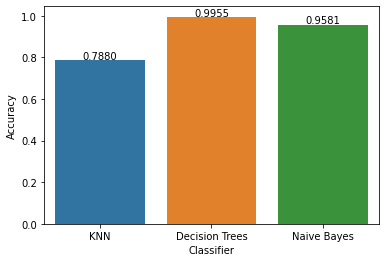

In [ ]:
names = ["KNN", "Decision Trees", "Naive Bayes"]
kf_count1 = pd.DataFrame({'Name' : names, 'Score' : count_models_acc })
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_count1)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

**New Dataset**

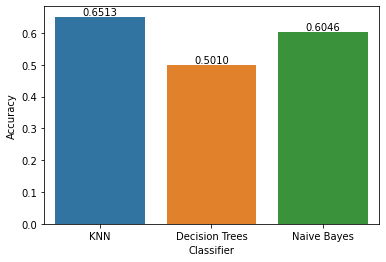

In [ ]:
  names = ["KNN", "Decision Trees", "Naive Bayes"]
kf_count1 = pd.DataFrame({'Name' : names, 'Score' : count_models2_acc })
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_count1)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

Given the performance of the three classification algorithms on the original and new dataset, we see that there is a drastic difference in the Decision Tree and Naive Bayes accuracies between the original and new dataset. The original dataset is the training and validation dataset, so we see that Decision Tree and Naive Bayes overfits the data. KNN has the best accuracy in the testing dataset and overfits the least amount as there isn’t a great drop in its accuracy measure. Therefore, we can say that KNN performs the best under countvectorizer.

### **TFIDF Vectorizer**

**Original Dataset**

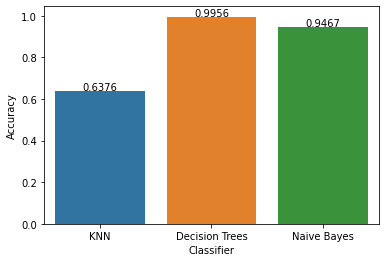

In [ ]:
names = ["KNN", "Decision Trees", "Naive Bayes"]
kf_count1 = pd.DataFrame({'Name' : names, 'Score' : tfidf_models_acc })
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_count1)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

**New Dataset**

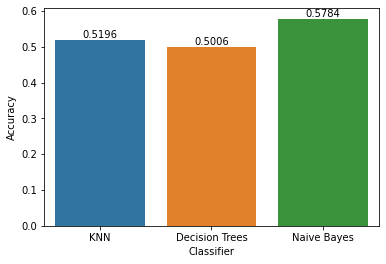

In [ ]:
names = ["KNN", "Decision Trees", "Naive Bayes"]
kf_count1 = pd.DataFrame({'Name' : names, 'Score' : tfidf_models2_acc })
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_count1)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

Although we can see that Decision Tree and Naive Bayes classifiers overfit on the original dataset based on the drop in the accuracy measure between original and new datasets, Naive Bayes still performs the best on the new (testing) dataset. KNN overfits by the least amount, but Naive Bayes would be considered best due to the highest accuracy on the new dataset. 